## Aufgabe zum Gradientenverfahren

In [188]:
# in this code block we gather all imports

from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import ppscore as pps
# we import pandas only since pps requires it
import pandas as pd


In [189]:
# in this code block we load the data

# this is the numner of data points aka. instances in the given dataset
number_of_known_data_points = 14

x_known_unsorted = np.asarray([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290]).astype('float32')
assert x_known_unsorted.shape == (number_of_known_data_points,)
assert x_known_unsorted.dtype == 'float32'

y_known_unsorted = np.asarray([44,97,30,51,95,51,44,41,21,40,90,83,61,92]).astype('float32')
assert y_known_unsorted.shape == (number_of_known_data_points,)
assert y_known_unsorted.dtype == 'float32'

dataset_known = np.asarray([ x_known_unsorted, y_known_unsorted ]).transpose()
dataset_known.sort(axis=0)
assert dataset_known.shape == (number_of_known_data_points,2)
assert dataset_known.dtype == 'float32'
print(dataset_known.shape)
print(f"dataset_known=\n{dataset_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
x_known = dataset_known[:,0]
assert x_known.shape == (number_of_known_data_points,)
assert x_known.dtype == 'float32'
print(f"x_known=\n{x_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
y_known = dataset_known[:,1]
assert y_known.shape == (number_of_known_data_points,)
assert y_known.dtype == 'float32'
print(f"y_known=\n{y_known}")


(14, 2)
dataset_known=
[[  84.   21.]
 [ 282.   30.]
 [ 396.   40.]
 [ 474.   41.]
 [ 501.   44.]
 [ 660.   44.]
 [ 810.   51.]
 [ 957.   51.]
 [1005.   61.]
 [1110.   83.]
 [1260.   90.]
 [1290.   92.]
 [1323.   95.]
 [1386.   97.]]
x_known=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_known=
[21. 30. 40. 41. 44. 44. 51. 51. 61. 83. 90. 92. 95. 97.]


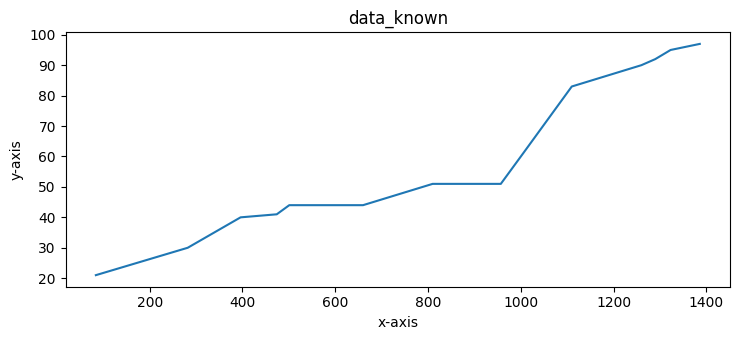

mean=[824.1429  60.    ]
trimmed_mean=[839.        60.166668]
mode=ModeResult(mode=array([[84., 44.]], dtype=float32), count=array([[1, 2]]))
range=[1302.   76.]
iqr=[741.75  46.5 ]
percentile_10=[316.2  33. ]
percentile_25=[480.75  41.75]
median=[883.5  51. ]
percentile_75=[1222.5    88.25]
percentile_90=[1313.1   94.1]
mad=[366.        22.571428]
std=[412.55402  25.21904]
var=[170200.83    636.  ]

correlation_matrix=
[[1.   0.96]
 [0.96 1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,y,0.767058,regression,True,mean absolute error,21.285715,4.958333,DecisionTreeRegressor()
2,y,x,0.686732,regression,True,mean absolute error,366.000000,114.656250,DecisionTreeRegressor()
3,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [190]:
# in this code block we do an EDA

# plain line plot
plt.figure(dpi=100)
plt.plot(x_known,y_known)
plt.title('data_known')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# location parameters
print(f"mean={dataset_known.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known)}")
print(f"iqr={stats.iqr(dataset_known, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known)}")

print(f"std={dataset_known.std(axis=0)}")
print(f"var={dataset_known.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known, rowvar=False).round(decimals=2)}")

dataset_known_pd = pd.DataFrame(dataset_known, columns = ['x','y'])
predictive_power_score_matrix_all_pd = pps.matrix(dataset_known_pd, output='df')
predictive_power_score_matrix_all_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)




In [191]:
# in this code block we define our model function


In [192]:
# in this code block our weight values are initialized in a very explicit verbose fashion

# this is the number of weights in our model function
# so it is also going to be the number of values in our vector of weights w
number_of_weights = 2

# in the following the variables prefixed with w_pre_ are just intermediate variables
# the variable w_init is the vector of our weights after initialization

# in this example we draw random values based on a normal distribution
# we actually draw two more values than number_of_weights
# since during the following min-max-normalization
# the smallest value, the min, always becomes .0 (or at least very close to it owed to floats)
# and the largest value, the max, always becomes 1. (or at least very close to it owed to floats)
w_pre_number_of_values = number_of_weights + 2
w_pre_random_values_float64 = np.random.normal(loc=.5, scale=.2, size=w_pre_number_of_values)
# note that the random function yields float64 however we want float32 all the way
w_pre_random_values = w_pre_random_values_float64.astype('float32')
assert w_pre_random_values.shape == (w_pre_number_of_values,)
assert w_pre_random_values.dtype == 'float32'
print(f"w_pre={w_pre_random_values}")

# the values in w_pre_initialized can be below 0 and above 1 so we min-max-normalize them
# in this case just out of curiosity through explicit code based on numpy primitives
# instead of using functionality from some library such as the MinMaxScaler from scikit-learn
# formula for min-max-normalization is value_min_max_normalized = value - min / max - min

# the min of the drawn random values and note that scalars have shape ()
w_pre_min = w_pre_random_values.min()
assert w_pre_min.shape == ()
assert w_pre_min.dtype == 'float32'
print(f"w_pre_min={w_pre_min}")

# the max of the drawn random values
w_pre_max = w_pre_random_values.max()
assert w_pre_max.shape == ()
assert w_pre_max.dtype == 'float32'
print(f"w_pre_max={w_pre_max}")

# the range
w_pre_range = w_pre_max - w_pre_min
assert w_pre_range.shape == ()
assert w_pre_range.dtype == 'float32'
print(f"w_pre_range={w_pre_range}")

# 1 over the range and note how the division yields float64 however we want float32 all the way
w_pre_range_reciprocal = (1 / w_pre_range).astype('float32')
assert w_pre_range_reciprocal.shape == ()
assert w_pre_range_reciprocal.dtype == 'float32'
print(f"w_pre_range_reciprocal={w_pre_range_reciprocal}")

# an array of the same shape as w_pre_random_values and where all values equal w_pre_min
w_pre_min_repeated = np.full_like(w_pre_random_values, w_pre_min)
assert w_pre_min_repeated.shape == (w_pre_number_of_values,)
assert w_pre_min_repeated.dtype == 'float32'
print(f"w_pre_min_repeated={w_pre_min_repeated}")

# an array with all the random values after subtracting w_pre_min from them
w_pre_minus_min = np.subtract(w_pre_random_values, w_pre_min_repeated)
assert w_pre_minus_min.shape == (w_pre_number_of_values,)
assert w_pre_minus_min.dtype == 'float32'
print(f"w_pre_minus_min={w_pre_minus_min}")

# the array with the min-max-normalized random values
w_pre_min_max_normalized = w_pre_minus_min * w_pre_range_reciprocal
assert w_pre_min_max_normalized.shape == (w_pre_number_of_values,)
assert w_pre_min_max_normalized.dtype == 'float32'
print(f"w_pre_min_max_normalized={w_pre_min_max_normalized}")

# we now mask the values that are equal or close to the minimum .0 or the maximum .1
w_pre_masked = np.ma.masked_outside(w_pre_min_max_normalized, .001, .999, copy=True)
assert w_pre_masked.shape == (w_pre_number_of_values,)
assert w_pre_masked.dtype == 'float32'
print(f"w_pre_masked={w_pre_masked}")

# to finally drop them using the function compressed() of the masking facility to obtain our weights
w_init_float = w_pre_masked.compressed()
print(f"w_init={w_init_float}")
assert w_init_float.shape == (number_of_weights,)
assert w_init_float.dtype == 'float32'



w_pre=[0.5250592  0.34370434 0.79203117 0.65554684]
w_pre_min=0.34370434284210205
w_pre_max=0.7920311689376831
w_pre_range=0.44832682609558105
w_pre_range_reciprocal=2.230515718460083
w_pre_min_repeated=[0.34370434 0.34370434 0.34370434 0.34370434]
w_pre_minus_min=[0.18135488 0.         0.44832683 0.3118425 ]
w_pre_min_max_normalized=[0.4045149 0.        1.        0.6955696]
w_pre_masked=[0.4045149087905884 -- -- 0.6955695748329163]
w_init=[0.4045149 0.6955696]
